In [1]:
import sys

import re, numpy as np, pandas as pd
from pprint import pprint

import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
#Use pandas to load the csv file as a dataframe
df = pd.read_csv('F:/Examples/Python Notebooks/death_labels_short.csv')

#Look at the first few records to make sure it loaded correctly
df.head()

,doc_id,label,text
0,2001-03810,child_maltreatment,MOTHER LEAVES BABY WITH LIVE IN BOYFRIEND 05-2...
1,2000-00214,asphyxiation,FOUND IN ACUTE RESPIRATORY FAILURE AT RESIDENC...
2,2000-00690,asphyxiation,DEC PLACED DOWN FOR NAP BY MOTHER'S BOYFRIEND ...
3,2001-01256,asphyxiation,02-14-2001. PARAMEDICS WERE CALLED ON A 4 MON...
4,2001-01756,asphyxiation,DECEDENT WAS LKA BY FATHER WHEN HE FED DECEDEN...


In [3]:
col = ['label', 'text']
df = df[col]
df = df[pd.notnull(df['text'])]
df.columns = ['label', 'text']
df['label_id'] = df['label'].factorize()[0]
label_id_df = df[['label', 'label_id']].drop_duplicates().sort_values('label_id')
label_to_id = dict(label_id_df.values)
id_to_label = dict(label_id_df[['label_id', 'label']].values)
df.head()

,label,text,label_id
0,child_maltreatment,MOTHER LEAVES BABY WITH LIVE IN BOYFRIEND 05-2...,0
1,asphyxiation,FOUND IN ACUTE RESPIRATORY FAILURE AT RESIDENC...,1
2,asphyxiation,DEC PLACED DOWN FOR NAP BY MOTHER'S BOYFRIEND ...,1
3,asphyxiation,02-14-2001. PARAMEDICS WERE CALLED ON A 4 MON...,1
4,asphyxiation,DECEDENT WAS LKA BY FATHER WHEN HE FED DECEDEN...,1


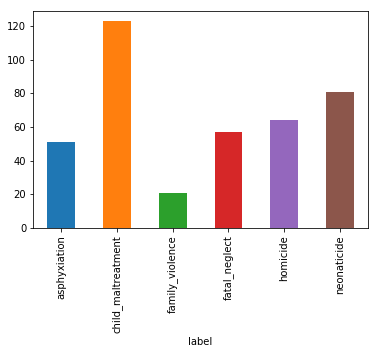

In [4]:
# Note that the dataset is not balanced so in the next version it is
# important to oversample and understample

df.groupby('label').text.count().plot.bar(ylim=0)

In [5]:
# We use the Machine Learning Library called sklearn 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

my_stop_words = text.ENGLISH_STOP_WORDS.union(["nfd", "nok", "gave", "around", "bft", "old", "per", "upon", "went", "also",  "baby", "found", "suspect", "custody", "mother", "child",
               "hospital", "decedent",  "gsw", "poss", "pron", "see", "hrs", "adm", "ajac", "antelop", "ave", "came", "trans", "transport", "hosp", "trauma",
               "ccs", "close", "come", "daniel", "date", "day", "dec", "decd", "deceas", "deced", "det", "determin", "children", "ago", "approximate", 
               "approximately", "antelope", "ages", "later", "probably", "probable", "new", "notifi", "notify", "notification", "miller",
               "black", "boy", "can", "call", "case", "come", "done", "find", "fnd", "give", "given", "hour", "huntington", "lapd", "lasd", "lka", 
               "minute", "min", "ofcf", "age", "month", "months", "paramedics", "paramedic", "state", "time", "times", "day", "days", "approximate", "approximately",
               "pend", "pending", "pron", "pronounce", "pronounced", "sdh", "sinc", "trans", "transfer", "tran", "transport", "traumat", "trauma", "year", "years",
               "develop", "effect", "expect", "fine", "freeman", "hollywood", "hour", "info", "lacharbor", "lacusc", "transported", "traumas", "mothers",
               "now", "occ", "offic", "one", "onto", "right", "told", "took", "two", "tri", "unk", "use", "year", "twohour", "proper", "ongoing", "fernandez",
               "yearold", "via", "will", "look", "along", "place", "factor", "abd", "mlk", "chp", "come", "didnt", "eng", "five", "howev", "however", "los", "hx", "fd", "ra",
               "garcia", "yrs", "lapdacu", "lacofd", "lafd", "autopsy", "autopsi", "request", "requested", "detect", "detective", "report", "reports", "reported", "rodriguez", 
                "hours", "hour", "ofcr", "chla", "staff", "noted", "shortly", "arrival", "notice", "going", " st", " francis", "center", "yr", "male", "angeles", "county", "hispanic", "female",
               "two", "see", "case", "notes", "note", "martinez", "ortiz", "centinela", "called", "calls", "caller", "notification","det",  "cell", "phone", "number", "contact", "information", "detectives", "detective", "request", "requested",
               "level", "tens", "franci", "order", "abl", "able", "ucla", "ronald", "reagan", "kaiser", "move", "avail", "secondary", "tense", "region", "report", "extensive", "require", "prior", "examination",
               "valley", "taylor", "california", "throughout",  "chavez", "fathersuspect", "firefight", "firefighter", "firefighters","follow", "coron", "coroner", "coroners", "torr", "torrance", "west", "white", "whether", "whose", "without", "within", "versus", "various",
               "across", "addit", "additional", "afternoon", "allow", "ambulance", "ambul", "angel", "ask", "asked", "asking", "autopsi", "away", "autopsyse", "begin", "began", "bring",
               "brown", "come", "323", "890", "5500", "562", "2005", "213", "485", "4220", "818", "756", "8748", "24", "2015", "fsc", "apt", "smith", "post", "result", "street", "comfort", "make",  "apartment", "number", "autopsy," ,"non", "apart", "give", "sheriff", "roadway","presbyterian", "pomona",  "get", "pmd", "sgt", "sergeant", "six", "want", "week","2009", "hour", "notification", "autopsy", "requested", "case", "decedent", "medical", "mother", "paramedics", "cc", "07", "10", "2014", "year", "old", "lac", "usc", "baby", "911", "pronounced", "hosp", "hospital", "trans", "transported"])

# For each term, calculate the TF-IDF, using the log of the frequency, normalization and bi and trigrams, as these may carry different meaning
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3),  stop_words=my_stop_words)
features = tfidf.fit_transform(df.text).toarray()
labels = df.label_id
features.shape

(397, 854)

In [6]:
# Use the chi-square to find terms that are most correlated within each category
from sklearn.feature_selection import chi2
import numpy as np
import scipy
N = 6
for label, label_id in sorted(label_to_id.items()):
  features_chi2 = chi2(features, labels == label_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))



# 'asphyxiation':
  . Most correlated unigrams:
. cold
. sids
. recent
. pillow
. foul
. play
  . Most correlated bigrams:
. play suspected
. unresponsive bed
. sleeping bed
. bed father
. known history
. foul play
  . Most correlated trigrams:
. shot wound head
. history good health
. multiple stab wounds
. gunshot wound head
. gun shot wound
. foul play suspected
# 'child_maltreatment':
  . Most correlated unigrams:
. subdural
. bruises
. retinal
. abuse
. battered
. shaken
  . Most correlated bigrams:
. numerous bruises
. physical abuse
. multiple bruises
. subdural hematoma
. shaken syndrome
. retinal hemorrhages
  . Most correlated trigrams:
. resuscitated cardiac arrest
. altered mental status
. sexual assault kit
. bilateral retinal hemorrhages
. gun shot wound
. declared brain dead
# 'family_violence':
  . Most correlated unigrams:
. evening
. brother
. suicide
. decedents
. self
. siblings
  . Most correlated bigrams:
. local station
. family residence
. inflicted gunshot
. ar

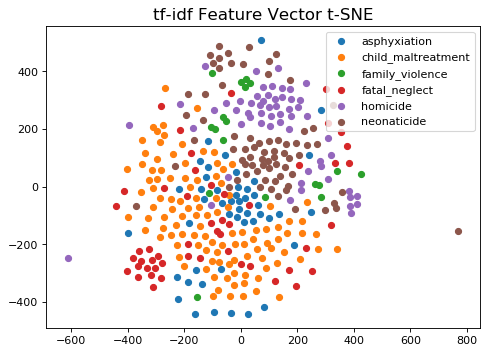

In [7]:
# We use t-SNE to project the multidimensional data onto a 2D plaine.
from sklearn.manifold import TSNE
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')

# I am going to use all the data, change the '1' to a different value to sample less 
SAMPLE_SIZE = int(len(features) * .9)

np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for label, label_id in sorted(label_to_id.items()):
    points = projected_features[(labels[indices] == label_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30,  label=label)
plt.title("tf-idf Feature Vector t-SNE",
          fontdict=dict(fontsize=15))
plt.legend()

#The result is not great, and some fine tuning will be in order

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(297,) (297,)
(100,) (100,)


In [9]:
print(clf.predict(count_vect.transform(["newborn infant found dead under suspicious circumstances possible drowning in bathroom shower suspect mother in custody "])))

['neonaticide']


In [10]:
print(clf.predict(count_vect.transform(["intra-uterine fetal demise due to homicide of mother"])))

['child_maltreatment']


In [11]:
print(clf.predict(count_vect.transform(["child was beaten by step father"])))

['child_maltreatment']


In [12]:
print(clf.predict(count_vect.transform(["Boy was shot Nate's Liquor Mart."])))

['homicide']


In [13]:
print(clf.predict(count_vect.transform(["baby declared dead after being shaken ."])))

['child_maltreatment']


In [14]:
print(clf.predict(count_vect.transform(["Navarro, who had checked into the motel earlier Monday, allegedly drowned her son and then tried to kill herself with over-the-counter sleeping aids, Olivieri said. After police arrived, Navarro was taken to a hospital for treatment and was later released into police custody. "])))

['child_maltreatment']


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])



C:\Users\g.barboza\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


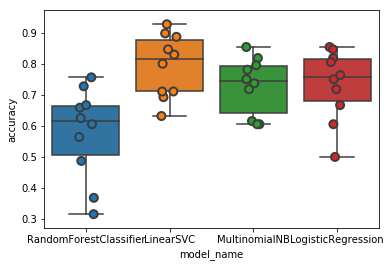

In [16]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [17]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.793099
LogisticRegression        0.732591
MultinomialNB             0.727790
RandomForestClassifier    0.577433
Name: accuracy, dtype: float64

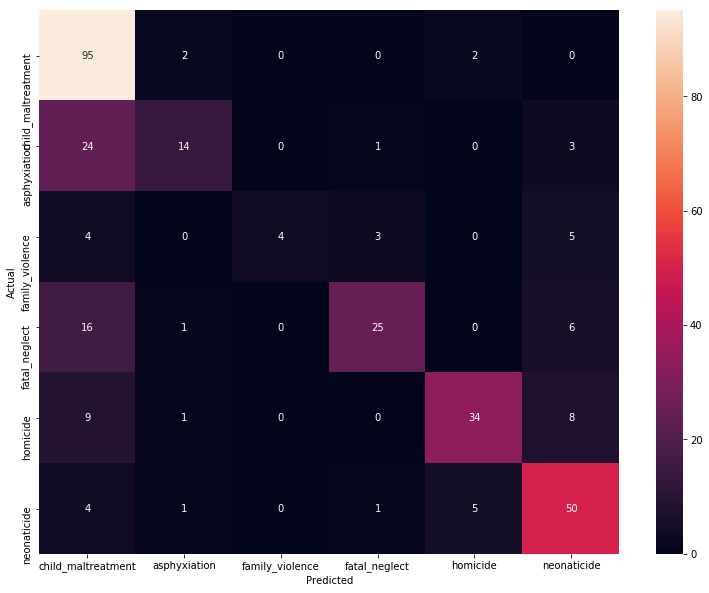

In [18]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.8, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=label_id_df.label.values, yticklabels=label_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [19]:
from IPython.display import display
for predicted in label_id_df.label_id:
  for actual in label_id_df.label_id:
    if predicted != actual and conf_mat[actual, predicted] >= 0:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_label[actual], id_to_label[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'text']])
      print('')

'asphyxiation' predicted as 'child_maltreatment' : 24 examples.


,label,text
1,asphyxiation,FOUND IN ACUTE RESPIRATORY FAILURE AT RESIDENC...
52,asphyxiation,DEC'D IS A 19 MONTH OLD FEM WHO WAS VOMITING F...
10,asphyxiation,POSS. SIDS LAST KNOWN ALIVE AT 0030 HRS F...
45,asphyxiation,REPORTEDLY CHOKED ON PAPER TOWEL CHOKED ON PAP...
4,asphyxiation,DECEDENT WAS LKA BY FATHER WHEN HE FED DECEDEN...
5,asphyxiation,TRANSPORTED INTO HOSPITAL ER BY PARAMEDICS FRO...
14,asphyxiation,INFANT LAST FED HERBAL TEA AT ABOUT 2200 HOURS...
8,asphyxiation,1 1/2 MONTH OLD INFANT TRANSPORTED TO HOSPITAL...
21,asphyxiation,3 Y/O CHILD WAS SLEEPING WITH HER MOTHER. MOT...
49,asphyxiation,4 MONTH OLD BABY WAS TRANS BY DEPUTY TO ER IN ...



'family_violence' predicted as 'child_maltreatment' : 4 examples.


,label,text
176,family_violence,APPARENT ASPHYXIATION FROM CHARCOAL BARBECUE. ...
194,family_violence,REPORTED THAT CHILD SIBLINGS DROPPED BABY IN T...
191,family_violence,PNEUMONIA CONGESTIVE HEART FAILURE CONGENITAL ...
188,family_violence,SHARP FORCE TRAUMA TO NECK THE DECEDENT WAS FO...



'fatal_neglect' predicted as 'child_maltreatment' : 16 examples.


,label,text
230,fatal_neglect,DECEDENT IS 7 WEEK OLD FEMALE FOUND UNRES...
223,fatal_neglect,DECEDENT WAS TRANSPORTED BY PARAMEDICS FROM RE...
199,fatal_neglect,FOUND UNRESPONSIVE IN RESIDENCE BY PD AFTER RE...
234,fatal_neglect,INFLICTED HEAD TRAUMA AND SEQUELAE. HOSPITAL S...
200,fatal_neglect,5 MONTH OLD MALE BROUGHT BY PARAMEDICS UNIT#26...
247,fatal_neglect,NO REPORT OF TRAUMA BUT INFANT HAS A BRUISE ...
231,fatal_neglect,HEALING RIB FRACTURES. SUBDURAL HEMATOMA. IN...
225,fatal_neglect,DECEDENT IS A 19 MONTH OLD FEMALE THAT HAD A F...
229,fatal_neglect,TODDLER REPORTED AS CHOKING ON MILK WHEN IN MO...
249,fatal_neglect,MOTHER CAME INTO ER AT APPROX 2250 HRS ON 07/1...



'homicide' predicted as 'child_maltreatment' : 9 examples.


,label,text
311,homicide,MULTIPLE STAB WOUNDS HOMICIDE. DEC'D 1 YEAR OL...
283,homicide,DECEDENT WAS BEING HELD BY MOTHER IN FRONT OF ...
307,homicide,MULTIPLE STAB WOUNDS THIS SIX-MONTH OLD INFANT...
297,homicide,MULTIPLE BLUNT FORCE INJURIES THE MOTHER OF TH...
310,homicide,MULTIPLE STAB WOUNDS 2 YR OLD WAS STABBED MUL...
312,homicide,MULITPLE SHARP FORCE INJURIES DECD WAS AT MOM...
304,homicide,KNIFE WOUND TO THROAT- SUSPECT IN CUSTODY IN O...
315,homicide,FELL OFF CLIFF PUSHED VS FALL FROM CLIFFS THE ...
305,homicide,MULTIPLE STAB WOUNDS ACCORDING TO THE AVAILABL...



'neonaticide' predicted as 'child_maltreatment' : 4 examples.


,label,text
331,neonaticide,BODY DUMP UNK CIRC BODY APPEARS TO HAVE BE...
341,neonaticide,FOUND IN ALLEY BY A CONTRACTOR WORKING NEARBY....
390,neonaticide,4 Y/O MALE WITH C/O ABDOMINAL PAIN AROUND 06:4...
375,neonaticide,BLUNT FORCE HEAD TRAUMA PREGNANT FEMALE WA...



'child_maltreatment' predicted as 'asphyxiation' : 2 examples.


,label,text
144,child_maltreatment,BLUNT TRAUMA TO THE BODY DECEDENT IS A 6MO ...
150,child_maltreatment,BLUNT FORCE HEAD TRAUMA DECEDENT WAS BROUGH...



'family_violence' predicted as 'asphyxiation' : 0 examples.


,label,text



'fatal_neglect' predicted as 'asphyxiation' : 1 examples.


,label,text
240,fatal_neglect,ASPHYXIA IMPOSED SUFFOCATION MOTHER FOUND DE...



'homicide' predicted as 'asphyxiation' : 1 examples.


,label,text
313,homicide,BLUNT ABDOMINAL TRAUMA DECEDENT WAS DISCOVE...



'neonaticide' predicted as 'asphyxiation' : 1 examples.


,label,text
364,neonaticide,24 WEEK OLD FETUS WHO WAS STILL BORN AFTER THE...



'child_maltreatment' predicted as 'family_violence' : 0 examples.


,label,text



'asphyxiation' predicted as 'family_violence' : 0 examples.


,label,text



'fatal_neglect' predicted as 'family_violence' : 0 examples.


,label,text



'homicide' predicted as 'family_violence' : 0 examples.


,label,text



'neonaticide' predicted as 'family_violence' : 0 examples.


,label,text



'child_maltreatment' predicted as 'fatal_neglect' : 0 examples.


,label,text



'asphyxiation' predicted as 'fatal_neglect' : 1 examples.


,label,text
51,asphyxiation,SUFFOCATION. THE DECEDENT HAD NO KNOWN MEDIC...



'family_violence' predicted as 'fatal_neglect' : 3 examples.


,label,text
190,family_violence,AUTO VS SEMI TRUCK SEE RELATED CASE #2014-0827...
181,family_violence,VEH VS VEH T-BONE ACCIDENT. TWO CHILDREN / TW...
182,family_violence,VEH VS VEH T-BONE ACCIDENT COMPANION TO CC# 07...



'homicide' predicted as 'fatal_neglect' : 0 examples.


,label,text



'neonaticide' predicted as 'fatal_neglect' : 1 examples.


,label,text
393,neonaticide,BLUNT TRAUMA 3MONTH OLD BABY WAS REPORTED K...



'child_maltreatment' predicted as 'homicide' : 2 examples.


,label,text
155,child_maltreatment,BEATING NO SUSPECT IN CUSTODY. MULTIPLE BLUN...
156,child_maltreatment,02-05-2002. DECEDENT IS 2 YRS OLD. TRANS TO ...



'asphyxiation' predicted as 'homicide' : 0 examples.


,label,text



'family_violence' predicted as 'homicide' : 0 examples.


,label,text



'fatal_neglect' predicted as 'homicide' : 0 examples.


,label,text



'neonaticide' predicted as 'homicide' : 5 examples.


,label,text
396,neonaticide,DEC IS A FETUS 28-WEEK GESTATION THAT WAS BORN...
357,neonaticide,FETUS FOUND AT TIME OF . SEE-2005-06433. (ANAY...
374,neonaticide,DECEDENT WAS DELIVERED BY C-SECTION AT HOSPITA...
371,neonaticide,FETUS FND BY DR SCHOLTZ DURING EXAM. SEE CC#2...
317,neonaticide,FETUS FD DURING OF FEMALE HOMICIDE VICTIM(SEE...



'child_maltreatment' predicted as 'neonaticide' : 0 examples.


,label,text



'asphyxiation' predicted as 'neonaticide' : 3 examples.


,label,text
22,asphyxiation,DECEDENT IS AN APPARENT FULL TERM CHILD DISCOV...
23,asphyxiation,DECEDENT WAS DISCOVERED UNRESPONSIVE AT RESIDE...
48,asphyxiation,MOTHER REPORTED TODDLER CHOKED ON A PLASTIC BA...



'family_violence' predicted as 'neonaticide' : 5 examples.


,label,text
175,family_violence,APPARENT ASPHYXIATION FROM CHARCOAL BARBECUE. ...
29,family_violence,ON 07/04/2013 MOTHER OF DECEDENT WAS INVOLVED ...
189,family_violence,MULTIPLE TRAUMA ACCORDING TO THE REPORTED INFO...
178,family_violence,BABY FD WHILE PERFORMING . CC#00652 FETAL DEM...
180,family_violence,DECEDENT'S THROAT SLASHED BY FATHER USING BUTC...



'fatal_neglect' predicted as 'neonaticide' : 6 examples.


,label,text
241,fatal_neglect,ACCORDING TO THE REPORTED INFORMATION THE ...
250,fatal_neglect,6 MONTH OLD IN THE BACK OF AN AMBULANCE UNDETE...
235,fatal_neglect,STARVATION UNSAFE SLEEP AREA THE DECEDENT WA...
214,fatal_neglect,8 MONTH YEAR OLD FEMALE POSSIBLE STARVATION O...
226,fatal_neglect,DECEDENT WAS TRANSPORTED INTO HOSPITAL WITH HE...
201,fatal_neglect,DECEDENT WAS DELIVERED AT HOME BY NATURAL CHIL...



'homicide' predicted as 'neonaticide' : 8 examples.


,label,text
293,homicide,gun shot wound TO CHEST EXITED MID BACK. ACCOR...
308,homicide,MOTHER APPARENTLY STABBED HER 3 CHILDREN TO DE...
259,homicide,SEQUELAE OF SEVERE BIRTH ASPHYXIA MOTHER OF DE...
294,homicide,MOTHER WITH GUNSHOT WOUND TO THE HEAD. DELIVE...
309,homicide,MOTHER APPARENLTY STABBED HER 3 CHILDREN TO DE...
286,homicide,***** 1ST CALL ****** SUSPECT CALLS POLICE...
269,homicide,BABY FOUND DURING . SEE CC# 2003-05881 INTRAUT...
306,homicide,SHARP FORCE TRAUMA TO NECK THE DECEDENT HAD BE...


In [20]:
model.fit(features, labels)
N = 6
for label, label_id in sorted(label_to_id.items()):
  indices = np.argsort(model.coef_[label_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  trigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 3][:N]
  print("# '{}':".format(label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))
  print("  . Top trigrams:\n       . {}".format('\n       . '.join(trigrams)))

# 'asphyxiation':
  . Top unigrams:
       . play
       . pillow
       . unresponsive
       . recent
       . foul
       . choking
  . Top bigrams:
       . foul play
       . unresponsive crib
       . unresponsive bed
       . known history
       . er residence
       . rigor mortis
  . Top trigrams:
       . foul play suspected
       . subdural hematoma retinal
       . hematoma retinal hemorrhages
       . multiple blunt force
       . presented emergency room
       . sexual assault kit
# 'child_maltreatment':
  . Top unigrams:
       . battered
       . abuse
       . shaken
       . boyfriend
       . bruising
       . bruises
  . Top bigrams:
       . retinal hemorrhages
       . suspected abuse
       . hemorrhages seen
       . shaken syndrome
       . abusive head
       . victim abuse
  . Top trigrams:
       . declared brain dead
       . resuscitated cardiac arrest
       . sexual assault kit
       . bilateral retinal hemorrhages
       . altered mental status
    

In [21]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

                    precision    recall  f1-score   support

child_maltreatment       0.62      0.96      0.76        99
      asphyxiation       0.74      0.33      0.46        42
   family_violence       1.00      0.25      0.40        16
     fatal_neglect       0.83      0.52      0.64        48
          homicide       0.83      0.65      0.73        52
       neonaticide       0.69      0.82      0.75        61

       avg / total       0.74      0.70      0.68       318



In [22]:
texts = ["On 4/3/17, while caring for his son., father, fell asleep. C.C.s father was holding him between his arm and his chest. When C.C.s mother, C. G., went to check on him, she noticed that he was purplish in color and unresponsive.",
         "On 6/9/17, J.C. was found cold to the touch, bluish in color, and unresponsive. His mother attempted CPR and 911 was called. J.C. was transported to the hospital and placed on a ventilator. Medical assessments revealed bleeding in his brain and swelling due to excessive fluids",
         "On 7/18/18, T.G. admitted that he back handed C.D., which caused her to fall down the steps and sustain a fatal brain injury. ",
         "On 3/5/17, H.D.'s parents reported that they found her unresponsive. 911 was called and she was transported to the hospital. Medical staff was not able to revive her and she passed away on this date. During the investigation by CP&P, it was discovered that H.D. had been sick for well over several weeks and her parents did not seek medical assistance. ",
         "On 8/26/17, K.F.'s mother, D.J., was driving around with her in the back seat, trying to find and purchase drugs. After D.J. obtained the drugs, she drove to a wooded area near her residence, parked, took the drugs, and then passed out. It is unknown how long K.F. and D.J. were sitting in the wooded area, parked in her car. At some point in time, K.F.'s father saw the car lights and inquired about their daughter. K.F. was found in the back seat of the car, unconscious. 911 was called; however, K.F. had passed away. "] 
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_label[predicted]))
  print("")

"On 4/3/17, while caring for his son., father, fell asleep. C.C.s father was holding him between his arm and his chest. When C.C.s mother, C. G., went to check on him, she noticed that he was purplish in color and unresponsive."
  - Predicted as: 'child_maltreatment'

"On 6/9/17, J.C. was found cold to the touch, bluish in color, and unresponsive. His mother attempted CPR and 911 was called. J.C. was transported to the hospital and placed on a ventilator. Medical assessments revealed bleeding in his brain and swelling due to excessive fluids"
  - Predicted as: 'fatal_neglect'

"On 7/18/18, T.G. admitted that he back handed C.D., which caused her to fall down the steps and sustain a fatal brain injury. "
  - Predicted as: 'child_maltreatment'

"On 3/5/17, H.D.'s parents reported that they found her unresponsive. 911 was called and she was transported to the hospital. Medical staff was not able to revive her and she passed away on this date. During the investigation by CP&P, it was disco